### Utilizando GroupBy

In [3]:
import numpy as np
import pandas as pd

In [4]:
file="C:\\projetos\\drinks.csv"
drinks = pd.read_csv(file)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent
0,Afghanistan,0,0,0,0.0,34.660.000,Asia
1,Albania,89,132,54,4.9,2.876.000,Europe
2,Algeria,25,0,14,0.7,40.061.000,Africa
3,Andorra,245,138,312,12.4,77.281.000,Europe
4,Angola,217,57,45,5.9,28.081.000,Africa


In [5]:
#Calculando a média de cerveja por todo o Dataset
drinks.beer_servings.mean()

106.16062176165804

In [6]:
#Calculando a média de cerveja consumida somente pelo continente Europeu
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

### Mas quem bebe mais?

### Podemos calcular a média de cerveja por cada continente?

In [7]:
cerveja_continente = drinks.groupby('continent').beer_servings.mean()

In [8]:
#Ordenando
cerveja_continente.sort_values(ascending=False)

continent
Europe           193.777778
South America    175.083333
North America    145.434783
Oceania           89.687500
Africa            61.471698
Asia              37.045455
Name: beer_servings, dtype: float64

### Qual o máximo de cerveja consumida nos continentes?

In [10]:
#Função de agregação como min e max também funcionam com groupby

drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [11]:
#Podemos realizar também multiplas agregações com a função agg que recebe uma lista de parametros presentes na função describe

drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [12]:
#Caso eu não especifique a coluna, a função groupby trará todas
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


### Vamos plotar nosso primeiro gráfico?

In [13]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='continent'>

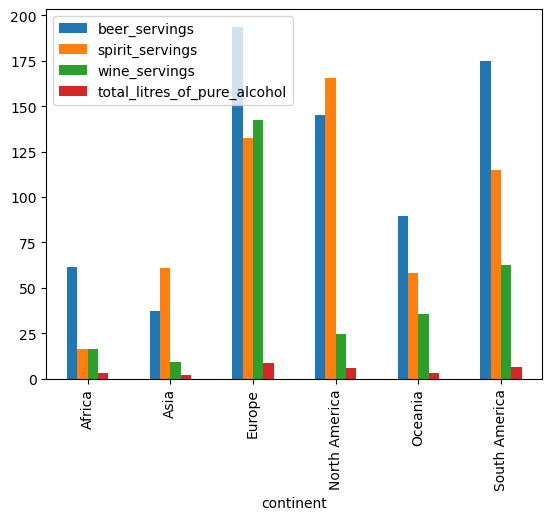

In [14]:
#Agrupando as bebidas por continente, tirando a média e plotando um gráfico de barras
drinks.groupby('continent').mean().plot(kind='bar')

### Exercicios

- Leia o Dataset de ordens de sanduiche
- Calcule o valor das contas agrupando por ordem_id
- Calcule a quantidade de itens agrupando por ordem_id

In [17]:
arquivo = "C:\\projetos\\sanduiches.txt"
vendas = pd.read_table(arquivo)
vendas.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [18]:
vendas['item_value'] = vendas.item_price.str.replace('$', '').astype(float)

C:\Users\Josi\AppData\Local\Temp\ipykernel_9996\114676681.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  vendas['item_value'] = vendas.item_price.str.replace('$', '').astype(float)


In [19]:
vendas.head()

,order_id,quantity,item_name,choice_description,item_price,item_value
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [21]:
vendas_agr = vendas.groupby('order_id').item_value.sum()

In [22]:
vendas_agr.head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_value, dtype: float64

In [23]:
qtd_agr = vendas.groupby('order_id').quantity.sum()

In [24]:
qtd_agr.head() 

order_id
1    4
2    2
3    2
4    2
5    2
Name: quantity, dtype: int64

In [25]:
vendas_agr.describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_value, dtype: float64

In [26]:
vendas.groupby('order_id').item_value.agg(['count', 'mean', 'min', 'max', 'sum']).head(20)

,count,mean,min,max,sum
order_id,,,,,
1,4,2.890,2.39,3.39,11.56
2,1,16.980,16.98,16.98,16.98
3,2,6.335,1.69,10.98,12.67
4,2,10.500,9.25,11.75,21.00
5,2,6.850,4.45,9.25,13.70
6,2,8.750,8.75,8.75,17.50
7,2,7.850,4.45,11.25,15.70
8,2,5.440,2.39,8.49,10.88
9,2,5.335,2.18,8.49,10.67


In [27]:
vendas_agr.max()

205.25

In [28]:
vendas_agr.min()

10.08